<center> Universidade Federal do Rio Grande do Sul (UFRGS)   
    
<center> Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à teoria de vibrações


### Trabalho 01 - Resposta de um sistema de 1 GDL submetido a uma excitação


Aluno João Paulo Chodacki Quiuqui

Cartão UFRGS 00312121


_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  

_Porto Alegre, RS, Brazil_ 


In [13]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1.Introdução <a name="section_1"></a> 


O presente trabalho tem como objetivo resolver a seguinte equação de equilíbrio de forma numérica:

$$ \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) +
   \frac{2 \zeta \omega_{\rm n}}{2 \Delta t} \left( u_{i+1} - u_{i-1} \right) + 
   \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$

Para a solução, é possível utilizar o Método das Diferenças Finitas ou a técnica da Integral de Duhamel, sendo empregada neste trabalho o segundo método.

### 1.1. Formulação do método de Duhamel <a name="section_11"></a> 

Para a solução numérica deste problema, é ncessário que a equação seja linear.

A expressão geral é:


$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

onde $u_0(t)$ é a resposta do sistema à condição de deslocamento inicial.

Considerando a identidade trigonométrica:

$$ \sin \omega_{\rm D} (t - \tau) = \sin \omega_{\rm D}t \; \sin \omega_{\rm D}\tau -
                                    \cos \omega_{\rm D}t \; \cos \omega_{\rm D}\tau $$

a equação é  portanto:

$$ u(t) = \frac{1}{m \omega_{\rm D}} \; \left[
          \frac{A(t)   \sin \omega_{\rm D}t - B(t)   \cos \omega_{\rm D}t}
               {\exp ( -\zeta\omega_{\rm n}t )} \right] $$

onde:

\begin{align*}
A(t) &= \int_0^t \exp ( -\zeta\omega_{\rm n}\tau ) \;
        \cos \omega_{\rm D} \tau \; F(\tau) \; d\tau \\
B(t) &= \int_0^t \exp ( -\zeta\omega_{\rm n}\tau ) \;
        \sin \omega_{\rm D} \tau \; F(\tau) \; d\tau
\end{align*}


Usando a discretização do tempo $t_i = i \Delta t$ :

\begin{align*}
e_i &= \exp ( -\zeta\omega_{\rm n} t_i ) \\
s_i &= \sin \omega_{\rm D} t_i  \\
c_i &= \cos \omega_{\rm D} t_i  \\
F_i &=  F(t_i)
\end{align*}

As funções $A_i = A(t_i)$ and $B_i = B(t_i)$  são calculadas como:

\begin{align*}
A_i &= \Delta t \; \sum_{j=0}^i e_j c_j F_j \\
B_i &= \Delta t \; \sum_{j=0}^i e_j s_j F_j
\end{align*}

e a solução geral será:

$$ u_i = u_{0i} + \frac{1}{m \omega_{\rm D} } \left( \frac{A_i s_i - B_i c_i}{e_i} \right)$$

com as condições iniciais (deslocamento $u_0$ e velocidade $v_0$) como:

$$ u_{0i} = \frac{1}{e_i} 
            \left[ u_0 c_i + 
            \left( \frac{v_0 + u_0 \zeta \omega_{\rm n}}{\omega_{\rm D}} \right) s_i \right]$$



## 2. Aplicação prática do método



Para a aplicação prática do método, mediu-se a aceleração nos três eixos de uma passarela do tipo viga engastada situada na Orla do Guaíba na altura da Usina do Gasômetro na cidade de Porto alegre.

<img src="dados/medicao6.jpg" width="480px"/>
<center> Figura 1 - Passarela onde foi realizada as mediçõeos com um acelerômetro de um smartphone.


Através dos acelerômetros instalados nos telefones celulares, com o aplicativo "iNVH" da Bosh foi possível medir a resposta da estrutura e seu amortecimento frente a um impuslso.

<img src="dados/medicao3.jpg" width="480px"/>
<center>Figura 2 - Posicionamento do smartphone durante a medição das acelerações.


### 2.1 Definição dos valores iniciais

In [14]:
m  = 3.0                                 # massa do sistema em kg
Tn = np.linspace(0.1,20,200)             # vetor do período (criado para variação da frequência)
fn = 1/Tn                                # frequência natural em Hz
zt = 0.01                                # damping as ratio of critical
u0 = 0.                                  # desocamento inicial
v0 = 0.                                  # velocidade inciail


### 2.2 Importação dos dados do arquivo


Importando as três acelerações medidas (aceleração nas direções x, y e z), e plotando a aceleração pelo tempo de medição (aproximadamente 60 s):


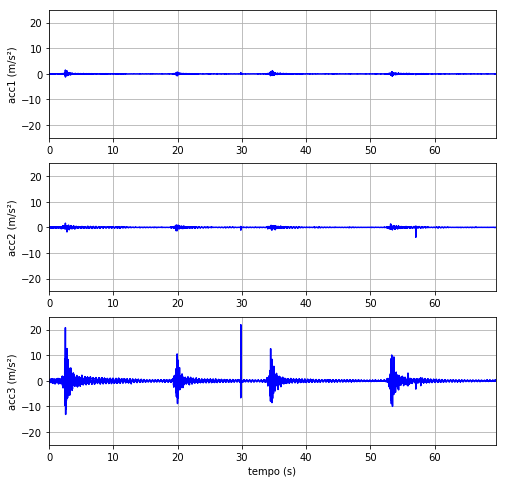

In [15]:
data = MRPy.from_file('dados/iNVH002', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc, 'b')

    plt.xlim(0, data.Td);   
    plt.ylim(-25, 25);
    plt.ylabel('acc{0} (m/s²)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('tempo (s)');


Para aproximação de um sistema com um grau de liberdade, desprezou-se as acelerações nas direções x e y:


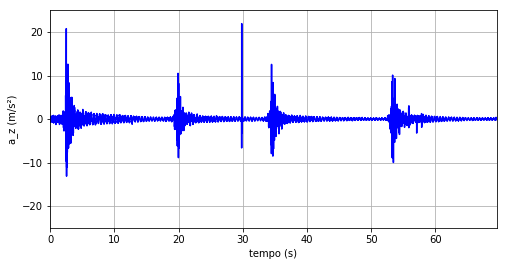

In [16]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0],'b')

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-25, 25);   plt.ylabel('a_z (m/s²)') 

plt.grid(True) 


### 2.3 Aplicação do método da Integral de Duhamel


Aplicando o método apresentado através de uma função já programada, obteve-se o deslocamento máximo para cada uma das frequências/período.

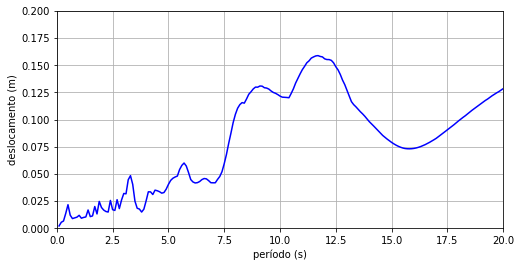

In [17]:
umax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0, v0)/m
    umax[k] = u.max()
    
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, umax, 'b')

plt.xlim(0, Tn[-1]);        plt.xlabel('período (s)') 
plt.ylim(0, 0.2);  plt.ylabel('deslocamento (m)') 

plt.grid(True) 


### 2.5 Pseudoaceleração

Através do gráfico anterior, calculou-se o espectro dos máximos deslocamentos multiplicados por $2\pi f_n$, denominado pseudoaceleração.

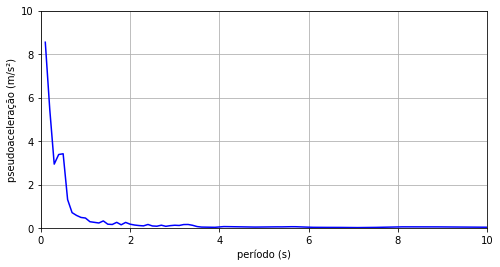

In [18]:
psa = ((2*np.pi*fn)**2)*umax
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, psa, 'b')

plt.xlim(0, 10);        plt.xlabel('período (s)') 
plt.ylim(0, 10);  plt.ylabel('pseudoaceleração (m/s²)') 

plt.grid(True) 


## 3.0 Cálculo do Periodograma

Através do sinal, plotou-se novamente a aceleração na vertical, e através da função periodograma já programada, plotou-se o periodograma.

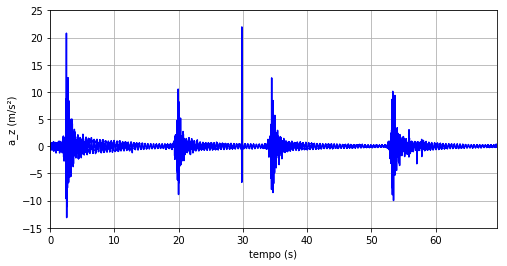

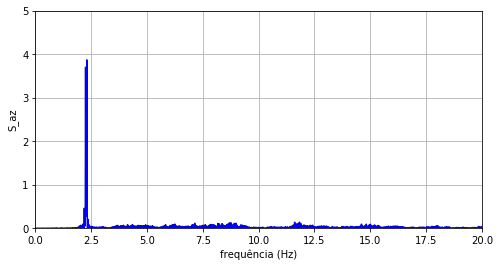

In [19]:
data = MRPy.from_file('dados/iNVH002', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(t, az[0],'b')

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-15, 25);   plt.ylabel('a_z (m/s²)') 

plt.grid(True) 

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0],'b')

plt.xlim(0, 20);   plt.xlabel('frequência (Hz)') 
plt.ylim(0,  5);   plt.ylabel('S_az') 

plt.grid(True)


Analizando o periodograma, é possível observar uma frequência dominante com o valor de  2,5𝐻𝑧 .

Calculando a resposta em termos do deslocamento através da Integral de Duhamel, para a freuquência de  2,5𝐻𝑧  e o periodograma para a mesma frequência, pode-se obter as seguintes figuras:

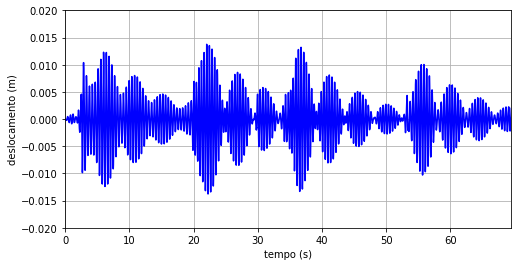

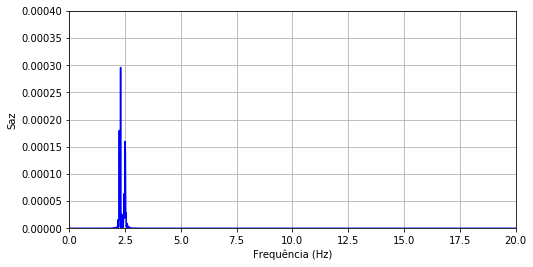

In [21]:
# Parâmetros de entrada na Integral de Duhamel

fnu = 2.5 # Frequência natural do sistema em Hz
u0 = 0. # Deslocamento inicial
v0 = 0. # Velocidade inicial
zt = 0.01                                # damping as ratio of critical

# Cálculo da resposta "u" para 2Hz pela Integral de Duhamel
u_DH = az.sdof_Duhamel(fnu, zt, u0, v0)/m

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('tempo (s)') 
plt.ylim(-0.020, 0.020);  plt.ylabel('deslocamento (m)') 

plt.grid(True) 

Saz, fs = u_DH.periodogram()
f = u_DH.f_axis()
plt.figure(10, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0],'b' )
plt.xlim(0, 20); plt.xlabel('Frequência (Hz)')
plt.ylim(0, 0.0004); plt.ylabel('Saz')
plt.grid(True)




## Conclusão

Uma estrutura de uma viga engastada foi aproximada para um sistema de 1 grau de liberdade. Determinou-se a pseudoaceleração e o periodograma.